# Cleaning Data & Analysis

In [1]:
#importing libraries

import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
# loading dataset

ds=pd.read_csv(r"C:\Users\User\Desktop\new datasets\youtube Uncleaned_Cnn.csv")

In [3]:
ds.head()

,title,views,when
0,College grad challenges Justice Thomas' argume...,2.9K views,19 minutes ago
1,College grad challenges Justice Thomas' argume...,2.9K views,19 minutes ago
2,"AI needs 'a new era of law and regulation,' sa...",10K views,9 hours ago
3,Hear why Pence wanted to meet with Zelensky an...,86K views,16 hours ago
4,Watch as verdict is read in former Parkland sc...,26K views,21 hours ago


In [4]:
ds.sample(25)

,title,views,when
139,Russia may have lost 4 aircraft within its own...,740K views,1 month ago
207,Alec Baldwin’s attorney says ‘Rust’ shooting p...,123K views,2 months ago
159,Iran expert: Nuclear program 'advancing at the...,71K views,1 month ago
363,Breaking Up (and Making Up) with Your Phone,19K views,4 months ago
91,Surveillance footage shows moments before teen...,92K views,1 month ago
263,Hear Ivanka Trump’s reaction to her father’s i...,1.4M views,3 months ago
23,Survivors describe chaos and desperation aboar...,37K views,6 days ago
346,Ex-GOP governor calls Trump's vow at CPAC 'tro...,379K views,3 months ago
76,"Ukraine has ‘advanced’ in the east, deputy def...",779K views,3 weeks ago
188,Hear son’s desperate plea to get parents out o...,12K views,2 months ago


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   428 non-null    object
 1   views   428 non-null    object
 2   when    428 non-null    object
dtypes: object(3)
memory usage: 10.2+ KB


In [6]:
ds.isnull().sum()

title    0
views    0
when     0
dtype: int64

### Cleaning dataset

In [7]:
# splitting
ds[['number of views','views_text']]=ds['views'].str.split(expand=True)

In [8]:
ds

,title,views,when,number of views,views_text
0,College grad challenges Justice Thomas' argume...,2.9K views,19 minutes ago,2.9K,views
1,College grad challenges Justice Thomas' argume...,2.9K views,19 minutes ago,2.9K,views
2,"AI needs 'a new era of law and regulation,' sa...",10K views,9 hours ago,10K,views
3,Hear why Pence wanted to meet with Zelensky an...,86K views,16 hours ago,86K,views
4,Watch as verdict is read in former Parkland sc...,26K views,21 hours ago,26K,views
...,...,...,...,...,...
423,CNN fact-checks Biden's State of the Union speech,135K views,4 months ago,135K,views
424,Russian mercenaries reveal what happened to so...,1.2M views,4 months ago,1.2M,views
425,Video shows trapped child comfort sibling unde...,123K views,4 months ago,123K,views
426,'Liar!': Marjorie Taylor Greene interrupts Bid...,1.1M views,4 months ago,1.1M,views


In [9]:
# droping columns

ds.drop(['views','views_text'],axis=1,inplace=True)


In [10]:
ds

,title,when,number of views
0,College grad challenges Justice Thomas' argume...,19 minutes ago,2.9K
1,College grad challenges Justice Thomas' argume...,19 minutes ago,2.9K
2,"AI needs 'a new era of law and regulation,' sa...",9 hours ago,10K
3,Hear why Pence wanted to meet with Zelensky an...,16 hours ago,86K
4,Watch as verdict is read in former Parkland sc...,21 hours ago,26K
...,...,...,...
423,CNN fact-checks Biden's State of the Union speech,4 months ago,135K
424,Russian mercenaries reveal what happened to so...,4 months ago,1.2M
425,Video shows trapped child comfort sibling unde...,4 months ago,123K
426,'Liar!': Marjorie Taylor Greene interrupts Bid...,4 months ago,1.1M


In [11]:
#checking for duplicates

if len(ds['title'].unique())< len(ds.index):
    print('there are duplicates')

there are duplicates


In [12]:
# removing duplicates
ds.drop_duplicates('title',inplace=True)
ds

,title,when,number of views
0,College grad challenges Justice Thomas' argume...,19 minutes ago,2.9K
2,"AI needs 'a new era of law and regulation,' sa...",9 hours ago,10K
3,Hear why Pence wanted to meet with Zelensky an...,16 hours ago,86K
4,Watch as verdict is read in former Parkland sc...,21 hours ago,26K
5,Legal analyst identifies part of ruling that l...,1 day ago,86K
...,...,...,...
423,CNN fact-checks Biden's State of the Union speech,4 months ago,135K
424,Russian mercenaries reveal what happened to so...,4 months ago,1.2M
425,Video shows trapped child comfort sibling unde...,4 months ago,123K
426,'Liar!': Marjorie Taylor Greene interrupts Bid...,4 months ago,1.1M


Generating word cloud

In [13]:
stopwords= set(STOPWORDS)
print(stopwords)

{'her', 'that', 'however', "hasn't", 'not', 'been', 'by', 'over', 'and', 'were', 'while', 'your', 'itself', "couldn't", 'would', 'yourself', 'else', 'am', 'after', 'from', "why's", "they're", "aren't", "he'll", 'why', 'be', 'ever', 'herself', 'cannot', 'no', 'those', 'ours', 'in', 'being', 'myself', "where's", 'most', 'since', 'very', 'but', 'hers', "haven't", 'or', 'theirs', 'when', 'into', 'i', 'out', 'here', 'own', 'other', "let's", "they'd", "wasn't", 'once', 'did', "shouldn't", 'my', 'its', "she'd", 'further', 'as', "there's", 'off', 'their', 'if', "you'll", "don't", "they'll", "we're", 'until', 'before', 'for', 'who', 'where', 'they', 'doing', "weren't", 'could', 'again', "here's", 'only', 'was', 'we', "who's", 'his', "hadn't", "he's", 'against', "mustn't", "what's", 'yours', 'com', "we'd", 'any', 'yourselves', 'then', 'have', 'about', 'through', 'too', 'all', 'our', 'r', 'should', 'which', 'what', 'are', "he'd", 'during', 'also', 'this', 'can', 'me', 'has', 'an', "i'm", 'more', 

In [14]:
title_data = ' '.join(ds['title'])
print(title_data)

College grad challenges Justice Thomas' argument on affirmative action AI needs 'a new era of law and regulation,' says Microsoft president Hear why Pence wanted to meet with Zelensky and Ukrainian soldiers Watch as verdict is read in former Parkland school resource officer trial Legal analyst identifies part of ruling that left her scratching her head Presumed human remains found in Titan wreckage Putin greets supporters in rare appearance after Wagner rebellion Ex-CIA operative breaks down what Putin should do next Hear what ex-CIA director thinks Putin must do after rebellion Ukrainian FM predicts challenges to Putin’s power GOP presidential candidate fumbles question on radio show The US has an empty office building problem. Here's what landlords are doing about it Russia drops all charges against mercenary Wagner Group after insurrection Conway explains how new Trump audio is a ‘nail in the coffin’ NATO allies ‘frustrated’ US didn’t share Prigozhin intel Biden: We gave Putin no ex

In [15]:
# generating wordcloud
wordcloud = WordCloud(width = 1000, height = 600,
                     background_color = 'white',
                     stopwords = stopwords,
                     min_font_size = 10).generate(title_data)

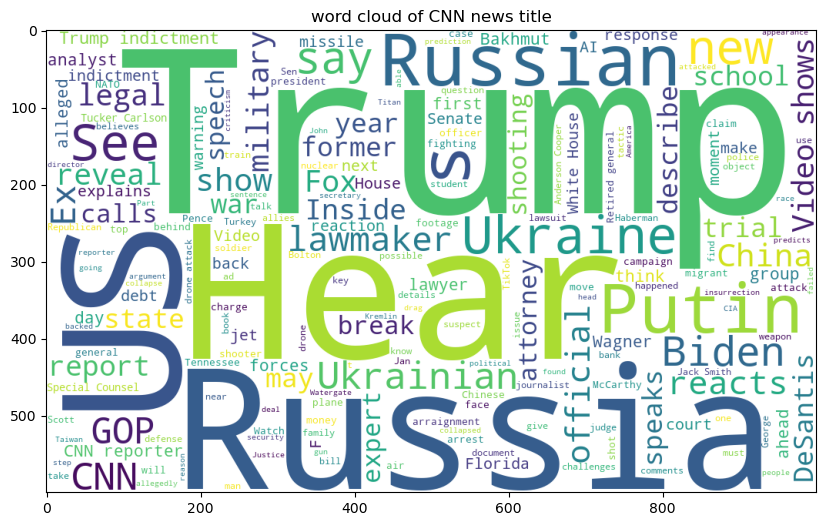

In [16]:
# ploting wordcloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.title('word cloud of CNN news title')
plt.show()